In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw08.ok')

Assignment: Homework 8: Confidence Intervals
OK, version v1.12.5



# Homework 8: Confidence Intervals

**Reading**: 
* [Estimation](https://www.inferentialthinking.com/chapters/13/estimation.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 8 is due **Thursday, 4/4 at 11:59pm**. You will receive an early submission bonus point if you turn in your final submission by Wednesday, 4/3 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the [policies](http://data8.org/sp19/policies.html) of this course. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw08.ok')

Assignment: Homework 8: Confidence Intervals
OK, version v1.12.5



## 1. Plot the Vote


Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.47 |
|Candidate T | 0.38 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *parameters*, or the proportion of the votes that each candidate will receive from the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [3]:
votes = Table.read_table('votes.csv')
num_votes = votes.num_rows
votes

vote
C
J
C
S
J
J
T
C
T
C


**Question 1.** Complete the function `one_resampled_proportion` below. It should return Candidate C's proportion of votes after computing one bootstrap sample of `tbl`.

**Note:** `tbl` will always be in the same format as `votes`.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [4]:
def one_resampled_proportion(tbl):
    tbl_sample = tbl.sample(1000, with_replacement = True) 
    return tbl_sample.where(tbl_sample.column(0), 'C').num_rows/tbl_sample.num_rows

one_resampled_proportion(votes)

0.464

**Question 2.** Below, with the help of `one_resampled_proportion`, complete the given code that will use bootstrapped samples from `votes` to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**. Make sure that you understand what's going on here. It may be helpful to explain `proportions_in_resamples` to a friend or TA.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [5]:
def proportions_in_resamples():
    prop_c = make_array()
    for i in np.arange(5000):
        prop_c=np.append(prop_c, one_resampled_proportion(votes))
    return prop_c

In the following cell, we run the function you just defined, `proportions_in_resamples`, and create a histogram of the calculated statistic for the 5,000 bootstrap estimates of the proportion of voters who voted for Candidate C. Based on what the original polling proportions were, does the graph seem reasonable? Talk to a friend or ask a TA if you are unsure!

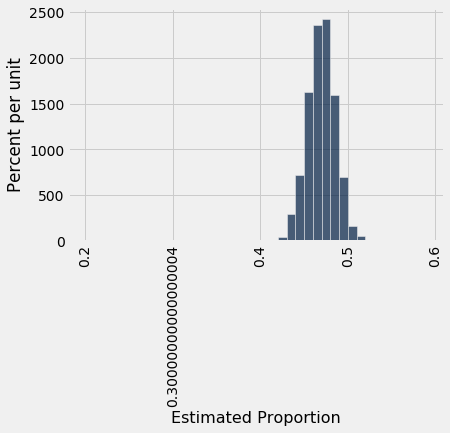

In [8]:
resampled_proportions = proportions_in_resamples()
Table().with_column('Estimated Proportion', resampled_proportions).hist(bins=np.arange(0.2,0.6,0.01))

**Question 3.** Using the array `resampled_proportions`, find the values at the two edges of the middle 95% of the values in the data. (Compute the lower and upper ends of the interval, named `c_lower_bound` and `c_upper_bound`, respectively.)

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [9]:
c_lower_bound = percentile(2.5, resampled_proportions)
c_upper_bound = percentile(97.5, resampled_proportions)
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(c_lower_bound, c_upper_bound))

Bootstrapped 95% confidence interval for the proportion of C voters in the population: [0.439000, 0.500000]


In [10]:
ok.grade("q1_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Define the function `one_resampled_difference` that returns exactly one estimate of Candidate C's true *lead* over Candidate T after computing one bootstrap sample of `tbl`.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [11]:
def one_resampled_difference(tbl):
    bootstrap = tbl.sample(1000, with_replacement = True)
    c_proportion = bootstrap.where(bootstrap.column(0), 'C').num_rows/bootstrap.num_rows
    t_proportion = bootstrap.where(bootstrap.column(0), 'T').num_rows/bootstrap.num_rows
    return c_proportion-t_proportion

one_resampled_difference(votes)

0.12

**Question 5.** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use confidence intervals to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{Candidate C's proportion of the vote} - \text{Candidate T's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate C's lead over Candidate T. Plot a histogram of the the resulting samples.

**Note:** Candidate C's lead can be negative.

<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

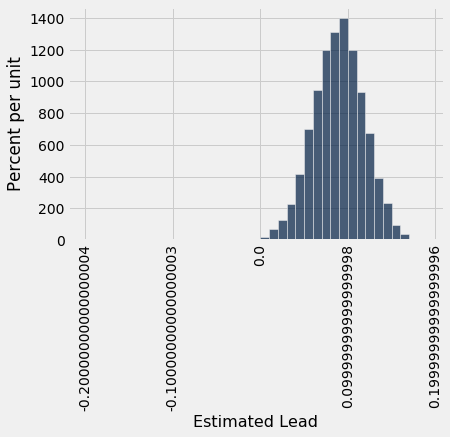

In [12]:
bins = np.arange(-0.2,0.2,0.01)

def leads_in_resamples():
    r = make_array()
    for i in np.arange(5000):
        r = np.append(r, one_resampled_difference(votes))
    return r

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist(bins=bins)

**Question 6.** Use the simulated data from Question 5 to compute an approximate 95% confidence interval for Candidate C's true lead over Candidate T.

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [13]:
diff_lower_bound = percentile(2.5, sampled_leads)
diff_upper_bound = percentile(97.5, sampled_leads)
print("Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [0.032000, 0.145000]


In [14]:
ok.grade("q1_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Interpreting Confidence Intervals


The staff computed the following 95% confidence interval for the proportion of Candidate C voters: 

$$[.439, .5]$$

(Your answer may have been a bit different; that doesn't mean it was wrong!)

#### Question 1
Can we say that there is a 95% probability that the interval [.439, .5] contains the true proportion of the population who is voting for Candidate C? Explain your answer.

<!--
BEGIN QUESTION
name: q2_1
manual: true
-->
<!-- EXPORT TO PDF -->

No. We say that we are 95% confident that the process resulted in a good interval. We just have an interval of estimates. It is a 95% confidence interval of estimates, because the process that generates it produces a good interval about 95% of the time. Thus, the probability is not exactly 95%. The probability that the simulated data captures the actual parameter isn't a proportion, it's either 0 or 1 because it either does or doesn't.

**Question 2**

The staff also created 80%, 90%, and 99% confidence intervals from the same sample, but we forgot to label which confidence interval represented which percentages! Identify which confidence levels correspond to which confidence intervals, and match each pair by writing the percentage after each interval below. **Then**, explain your thought process.

The intervals are below:

* [.444,.495] 
* [.450,.490] 
* [.430,.511]

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->
<!-- EXPORT TO PDF -->

[.444,.495] is a 90% confidence interval as it is neither very wide nor very short.

[.450,.490] is an 80% confidence interval as it is shorter as it contains less data values (80% as opposed to 90% or 99%).

[.430,.511] is a 99% confidence interval because it contains the widest range of values (doesn't contain only 1% of the data).

#### Question 3
Suppose we produced 10,000 new samples (each one a uniform random sample of 1,000 voters) from the population and created a 95% confidence interval from each one. Roughly how many of those 10,000 intervals do you expect will actually contain the true proportion of the population?

Assign your answer to `true_proportion_intervals`.

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [15]:
true_proportion_intervals = 9500

In [16]:
ok.grade("q2_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Recall the second bootstrap confidence interval you created, estimating Candidate C's lead over Candidate T. Among
voters in the sample, her lead was .09. The staff's 95% confidence interval for her true lead (in the population of all voters) was

$$[.032,.15].$$

Suppose we are interested in testing a simple yes-or-no question:

> "Are the candidates tied?"

Our null hypothesis is that the proportions are equal, or, equivalently, that Candidate C's lead is exactly 0. Our alternative hypothesis is that her lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only the staff's 95% confidence interval.


**Question 4** 

Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `candidates_tied` to the number corresponding to the correct answer.

1. Reject the null
2. Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

*Hint:* If you're confused, take a look at [this chapter](https://www.inferentialthinking.com/chapters/13/4/using-confidence-intervals.html) of the textbook.

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [17]:
candidates_tied = 1

In [18]:
ok.grade("q2_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 5
What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null
2. Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

<!--
BEGIN QUESTION
name: q2_5
manual: false
-->

In [19]:
cutoff_one_percent = 3

In [20]:
ok.grade("q2_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 6
What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null
2. Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

<!--
BEGIN QUESTION
name: q2_6
manual: false
-->

In [21]:
cutoff_ten_percent = 1

In [22]:
ok.grade("q2_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [ ]:
_ = ok.submit()

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")